In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pulse2percept as p2p

2017-03-29 18:41:48,128 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
# Load an Argus II array
argus = p2p.implants.ArgusII(x_center=-500, y_center=100, h=100, rot=np.deg2rad(45))

2017-03-29 18:41:48,134 [pulse2percept.implants] [WARNING] Distance to fovea=3211 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


In [3]:
# Start the simulation framework
sim = p2p.Simulation(argus, engine='joblib', num_jobs=6)

In [4]:
# Set parameters of the optic fiber layer (OFL)
# In previous versions of the model, this used to be called the `Retina`
# object, which created a spatial grid and generated the axtron streak map.
sampling = 100       # spatial sampling of the retina (microns)
axon_lambda = 2        # constant that determines fall-off with axonal distance
sim.set_optic_fiber_layer(sampling=sampling, axon_lambda=axon_lambda,
                          x_range=[-3500, 2500], y_range=[-3000, 3000])

In [5]:
# Set parameters of the ganglion cell layer (GCL)
# In previous versions of the model, this used to be called `TemporalModel`.
t_gcl = 0.005 / 1000   # Sampling step (s) for the GCL computation
sim.set_ganglion_cell_layer(tsample=t_gcl)

In [6]:
# Send a pulse train to two specific electrodes, set all others to zero
pt = p2p.stimuli.PulseTrain(t_gcl, freq=50, amp=20, dur=0.5)
stim = {'E7': pt, 'A8': pt}

(<matplotlib.figure.Figure at 0x7f30383efa20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f30170ba1d0>)

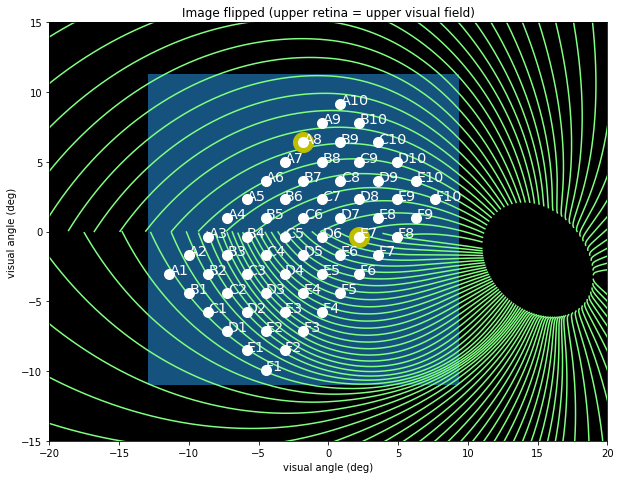

In [7]:
sim.plot_fundus(stim)

In [8]:
# Run a simulation
# - ignore 25% dimmest pixels
# - simulate ganglion cell layer (GCL) and optic fiber layer (OFL),
#   ignore inner nuclear layer (INL)
percept = sim.pulse2percept(stim, tol=0.25, layers=['GCL', 'OFL'])

2017-03-29 18:41:49,613 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-29 18:41:52,539 [pulse2percept.api] [INFO] tol=25.0%, 3064/3721 px selected
2017-03-29 18:44:08,963 [pulse2percept.api] [INFO] Done.


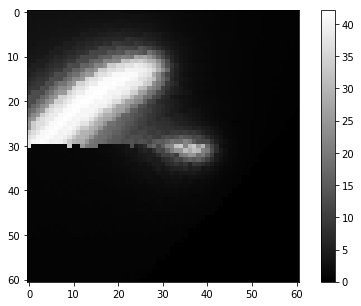

In [9]:
frame = p2p.get_brightest_frame(percept)
plt.figure(figsize=(8, 5))
plt.imshow(frame.data, cmap='gray')
plt.colorbar()

In [10]:
# This requires ffmpeg or libav-tools
p2p.files.save_video(percept, 'percept.mp4', fps=30)

2017-03-29 18:44:10,835 [pulse2percept.files] [INFO] Saved video to file 'percept.mp4'.
